In [1]:
from func_search import *
from func_def_class import *
from func_taux_transm import *
from func_res import *
from HMM import *

import matplotlib.pyplot as plt

import random
from random import shuffle
import numpy as np
import json
import os
import sys

from sklearn.model_selection import train_test_split

In [2]:
#utilisées
from ghmm import *
import ghmm


In [3]:
#pas utilisées
"""
from myhmm import MyHmm
from myhmm_scaled import MyHmmScaled
import nltk 
from nltk.corpus import treebank
from hmmlearn import hmm
"""

'\nfrom myhmm import MyHmm\nfrom myhmm_scaled import MyHmmScaled\nimport nltk \nfrom nltk.corpus import treebank\nfrom hmmlearn import hmm\n'

# Données utilisées

## Création du jeu de donnée

In [3]:
alph = IntegerRange(1,9)
file_data_good = 'data_csv/sim_1_pkt_res.csv'
file_data_bad = 'data_csv/sim_4_pkt_res.csv'
seq_train_s, seq_train_f, seq_test_s, seq_test_f = HMM_parsing_data(file_data_good, file_data_bad, alph)

# TEST DE LA BIBLIOTHEQUE GHMM


# test avec les données reservation | simulation

In [15]:
#sigma = alphabet de la machine. ici [1;5] pour les 5 etats possibles des données
sigma = IntegerRange(1,9)
m_best_ini, fmeasure_tmp, recall_tmp, precision_tmp = HMM_find_best(seq_train_s, seq_train_f, seq_test_s, seq_test_f, sigma, 5, 100)


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63


In [4]:
print m_best_ini, fmeasure_tmp, recall_tmp, precision_tmp

NameError: name 'm_best_ini' is not defined

In [12]:
sigma = IntegerRange(1,9)
m_best_ini, fmeasure_tmp, recall_tmp, precision_tmp, l_fmeasure, l_recall, l_precision = HMM_get_indicators(seq_train_s, seq_train_f, seq_test_s, seq_test_f, sigma, 5, 10000)

GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 14
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 6
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, 

In [16]:

max(l_fmeasure)
l_fmeasure

[0.5714285714285714,
 0.3333333333333333,
 0.5714285714285714,
 0.5,
 0.3333333333333333,
 0.5,
 0.42857142857142855,
 0.36363636363636365,
 0.36363636363636365,
 0.3333333333333333,
 0.5,
 0.42857142857142855,
 0.2,
 0.2,
 0.5714285714285714,
 0.36363636363636365,
 0.4615384615384615,
 0.4615384615384615,
 0.4615384615384615,
 0.42857142857142855,
 0.6153846153846153,
 0.3333333333333333,
 0.36363636363636365,
 0.6153846153846153,
 0.4615384615384615,
 0.36363636363636365,
 0.4615384615384615,
 0.4615384615384615,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365,
 0.4615384615384615,
 0.4615384615384615,
 0.5,
 0.4615384615384615,
 0.4615384615384615,
 0.4615384615384615,
 0.4615384615384615,
 0.36363636363636365,
 0.30769230769230765,
 0.4615384615384615,
 0.4,
 0.4615384615384615,
 0.5,
 0.36363636363636365,
 0.4,
 0.4615384615384615,
 0.5,
 0.36363636363636365,
 0.4615384615384615,
 0.5,
 0.5,
 0.4615384615384615,
 0.36363636363636365,
 0.3333333333333333,
 0.461538

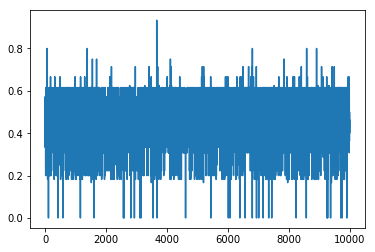

In [20]:
plt.plot(l_fmeasure)
plt.show()

In [37]:
def HMM_find_best(seq_train_s, seq_train_f, seq_test_s, seq_test_f, sigma, nb_states=5, nb_loops=10):

    #indicator
    precision_tmp, recall_tmp, fmeasure_tmp = 0,0,0
    m_best_ini = ghmm.DiscreteEmissionHMM
    l_fmeasure = []
    l_precision = []
    l_recall = []

    A = []
    B = []
    l_tmp = []

    for n in range(2,nb_states+1):
        del l_fmeasure[:]
        del l_precision[:]
        del l_recall[:]

        for loop in range(nb_loops):
            #A matrice proba transition etats | ici on a n etats
            #on ne teste que pour un A avce des valeurs aléatoire
            del A[:]
            for i in range(n):
                l_tmp = [random.randint(1,100) for i in xrange(n)]
                l_tmp[:]= [float(x)/sum(l_tmp) for x in l_tmp]
                A.append( l_tmp )

            #matrice de proba des evenements
            del B[:]
            for i in range(n):
                l_tmp = [random.randint(1,100) for i in xrange(len(sigma))]
                l_tmp[:]= [float(x)/sum(l_tmp) for x in l_tmp]
                B.append( l_tmp )

            #proba de l'etat initial
            pi = [random.randint(1,100) for i in xrange(n)]
            pi[:]= [float(x)/sum(pi) for x in pi]


            m_ini = HMMFromMatrices(sigma, DiscreteDistribution(sigma), A, B, pi)
            m_succes = HMMFromMatrices(sigma, DiscreteDistribution(sigma), A, B, pi)
            m_fail = HMMFromMatrices(sigma, DiscreteDistribution(sigma), A, B, pi)

            m_succes.baumWelch(seq_train_s)
            m_fail.baumWelch(seq_train_f)

            precision, recall, fmeasure, vp, vn, fp, fn = HMM_calcul_score(seq_test_s, seq_test_f, m_succes, m_fail)
            l_fmeasure.append(fmeasure)
            l_recall.append(recall)
            l_precision.append(precision)
            if fmeasure > fmeasure_tmp:
                m_best_ini = m_ini
                fmeasure_tmp = fmeasure
                recall_tmp = recall
                precision_tmp = precision
        
        plt.figure()
        plt.title("nb_state : %d" % n)
        plt.plot(l_fmeasure)
        print "nb states : %d" % n 
        print "fmeasure - mean : %f | min : %f | max : %f" %( sum(l_fmeasure)/len(l_fmeasure),min(l_fmeasure),max(l_fmeasure))
        print "precision - mean : %f | min : %f | max : %f" %( sum(l_precision)/len(l_precision),min(l_precision),max(l_precision))
        print "recall - mean : %f | min : %f | max : %f" %( sum(l_recall)/len(l_recall),min(l_recall),max(l_recall))
        print " "
        
    plt.show()
    return m_best_ini, fmeasure_tmp, recall_tmp, precision_tmp

nb states : 2
fmeasure - mean : 0.535364 | min : 0.307692 | max : 0.750000
precision - mean : 0.565714 | min : 0.285714 | max : 0.857143
recall - mean : 0.514012 | min : 0.333333 | max : 0.714286
 
nb states : 3
fmeasure - mean : 0.527941 | min : 0.363636 | max : 0.705882
precision - mean : 0.507143 | min : 0.285714 | max : 0.857143
recall - mean : 0.560671 | min : 0.428571 | max : 0.750000
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15


nb states : 4
fmeasure - mean : 0.473725 | min : 0.200000 | max : 0.666667
precision - mean : 0.432857 | min : 0.142857 | max : 0.714286
recall - mean : 0.534488 | min : 0.333333 | max : 0.666667
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1,

nb states : 5
fmeasure - mean : 0.441339 | min : 0.250000 | max : 0.615385
precision - mean : 0.388571 | min : 0.142857 | max : 0.571429
recall - mean : 0.536143 | min : 0.333333 | max : 1.000000
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 14
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 6
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 14
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, 

nb states : 6
fmeasure - mean : 0.424916 | min : 0.181818 | max : 0.857143
precision - mean : 0.362857 | min : 0.142857 | max : 1.000000
recall - mean : 0.554770 | min : 0.250000 | max : 1.000000
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 14
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 6
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, 

nb states : 7
fmeasure - mean : 0.405046 | min : 0.000000 | max : 0.800000
precision - mean : 0.340000 | min : 0.000000 | max : 0.857143
recall - mean : 0.540631 | min : 0.000000 | max : 1.000000
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 6
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, 

nb states : 8
fmeasure - mean : 0.415756 | min : 0.000000 | max : 0.875000
precision - mean : 0.345714 | min : 0.000000 | max : 1.000000
recall - mean : 0.585980 | min : 0.000000 | max : 1.000000
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 14
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 6
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 9
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t

nb states : 9
fmeasure - mean : 0.448276 | min : 0.000000 | max : 0.875000
precision - mean : 0.388571 | min : 0.000000 | max : 1.000000
recall - mean : 0.588984 | min : 0.000000 | max : 1.000000
 


GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 20
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 63
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 14
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 6
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 9
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 25
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 17
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 55
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t = 15
GHMM ghmm.py:148 - viterbi.c:ghmm_dmodel_viterbi(328): state_seq_index = -1, t

nb states : 10
fmeasure - mean : 0.524235 | min : 0.000000 | max : 0.933333
precision - mean : 0.475714 | min : 0.000000 | max : 1.000000
recall - mean : 0.646667 | min : 0.000000 | max : 1.000000
 


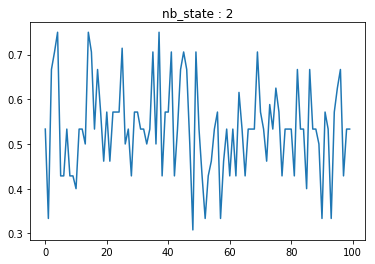

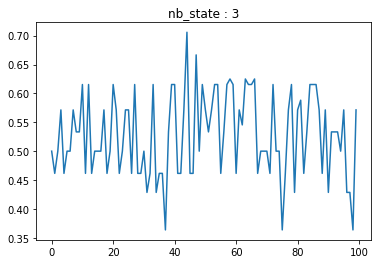

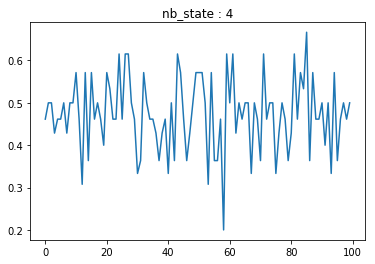

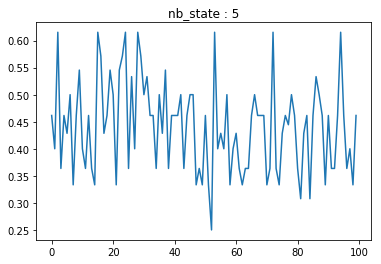

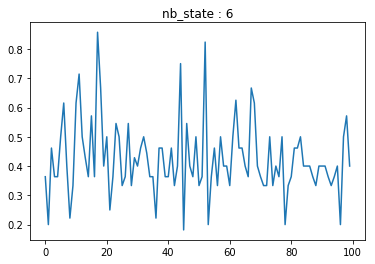

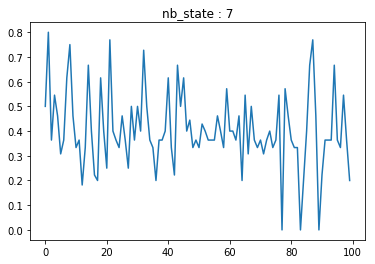

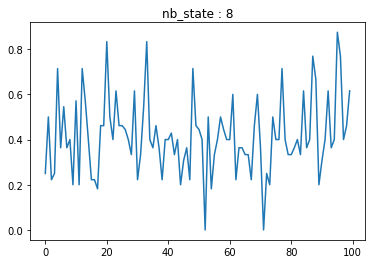

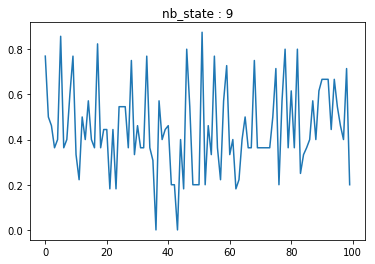

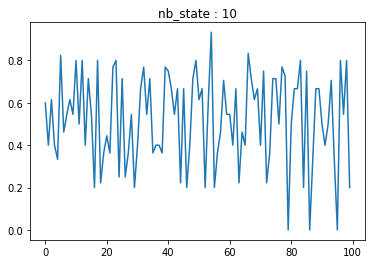

In [38]:
sigma = IntegerRange(1,9)
m_best_ini, fmeasure_tmp, recall_tmp, precision_tmp = HMM_find_best(seq_train_s, seq_train_f, seq_test_s, seq_test_f, sigma, 10, 100)
